![](https://www.pata.org/wp-content/uploads/2014/09/TripAdvisor_Logo-300x119.png)
# Predict TripAdvisor Rating

# Imports

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from collections import Counter
import re
import datetime
from datetime import datetime
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

from sklearn.model_selection import train_test_split

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

In [2]:
# Fix random seed
RANDOM_SEED = 42

In [3]:
# Fix packages version
!pip freeze > requirements.txt

# DATA

In [4]:
df_train = pd.read_csv('main_task.csv')
df_test = pd.read_csv('kaggle_task.csv')
sample_submission = pd.read_csv('sample_submission.csv')

In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Restaurant_id      40000 non-null  object 
 1   City               40000 non-null  object 
 2   Cuisine Style      30717 non-null  object 
 3   Ranking            40000 non-null  float64
 4   Rating             40000 non-null  float64
 5   Price Range        26114 non-null  object 
 6   Number of Reviews  37457 non-null  float64
 7   Reviews            40000 non-null  object 
 8   URL_TA             40000 non-null  object 
 9   ID_TA              40000 non-null  object 
dtypes: float64(3), object(7)
memory usage: 3.1+ MB


In [6]:
df_train.head(5)

,Restaurant_id,City,Cuisine Style,Ranking,Rating,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA
0,id_5569,Paris,"['European', 'French', 'International']",5570.0,3.5,$$ - $$$,194.0,"[['Good food at your doorstep', 'A good hotel ...",/Restaurant_Review-g187147-d1912643-Reviews-R_...,d1912643
1,id_1535,Stockholm,NaN,1537.0,4.0,NaN,10.0,"[['Unique cuisine', 'Delicious Nepalese food']...",/Restaurant_Review-g189852-d7992032-Reviews-Bu...,d7992032
2,id_352,London,"['Japanese', 'Sushi', 'Asian', 'Grill', 'Veget...",353.0,4.5,$$$$,688.0,"[['Catch up with friends', 'Not exceptional'],...",/Restaurant_Review-g186338-d8632781-Reviews-RO...,d8632781
3,id_3456,Berlin,NaN,3458.0,5.0,NaN,3.0,"[[], []]",/Restaurant_Review-g187323-d1358776-Reviews-Es...,d1358776
4,id_615,Munich,"['German', 'Central European', 'Vegetarian Fri...",621.0,4.0,$$ - $$$,84.0,"[['Best place to try a Bavarian food', 'Nice b...",/Restaurant_Review-g187309-d6864963-Reviews-Au...,d6864963


In [7]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Restaurant_id      10000 non-null  object 
 1   City               10000 non-null  object 
 2   Cuisine Style      7693 non-null   object 
 3   Ranking            10000 non-null  float64
 4   Price Range        6525 non-null   object 
 5   Number of Reviews  9343 non-null   float64
 6   Reviews            9998 non-null   object 
 7   URL_TA             10000 non-null  object 
 8   ID_TA              10000 non-null  object 
dtypes: float64(2), object(7)
memory usage: 703.2+ KB


In [8]:
df_test.head(5)

,Restaurant_id,City,Cuisine Style,Ranking,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA
0,id_0,Paris,"['Bar', 'Pub']",12963.0,$$ - $$$,4.0,"[[], []]",/Restaurant_Review-g187147-d10746918-Reviews-L...,d10746918
1,id_1,Helsinki,"['European', 'Scandinavian', 'Gluten Free Opti...",106.0,$$ - $$$,97.0,"[['Very good reviews!', 'Fine dining in Hakani...",/Restaurant_Review-g189934-d6674944-Reviews-Ra...,d6674944
2,id_2,Edinburgh,['Vegetarian Friendly'],810.0,$$ - $$$,28.0,"[['Better than the Links', 'Ivy Black'], ['12/...",/Restaurant_Review-g186525-d13129638-Reviews-B...,d13129638
3,id_3,London,"['Italian', 'Mediterranean', 'European', 'Vege...",1669.0,$$$$,202.0,"[['Most exquisite', 'Delicious and authentic']...",/Restaurant_Review-g186338-d680417-Reviews-Qui...,d680417
4,id_4,Bratislava,"['Italian', 'Mediterranean', 'European', 'Seaf...",37.0,$$$$,162.0,"[['Always the best in bratislava', 'Very good ...",/Restaurant_Review-g274924-d1112354-Reviews-Ma...,d1112354


In [9]:
sample_submission.head(5)

,Restaurant_id,Rating
0,id_0,2.0
1,id_1,2.5
2,id_2,4.0
3,id_3,1.0
4,id_4,4.0


In [10]:
sample_submission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Restaurant_id  10000 non-null  object 
 1   Rating         10000 non-null  float64
dtypes: float64(1), object(1)
memory usage: 156.4+ KB


In [11]:
# Concatenate train and test datasets
df_train['sample'] = 1 # train dataset
df_test['sample'] = 0 # test dataset
df_test['Rating'] = 0 # we should predict Rating values, so as of now nake it 0

data = df_test.append(df_train, sort=False).reset_index(drop=True)

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Restaurant_id      50000 non-null  object 
 1   City               50000 non-null  object 
 2   Cuisine Style      38410 non-null  object 
 3   Ranking            50000 non-null  float64
 4   Price Range        32639 non-null  object 
 5   Number of Reviews  46800 non-null  float64
 6   Reviews            49998 non-null  object 
 7   URL_TA             50000 non-null  object 
 8   ID_TA              50000 non-null  object 
 9   sample             50000 non-null  int64  
 10  Rating             50000 non-null  float64
dtypes: float64(3), int64(1), object(7)
memory usage: 4.2+ MB


In [13]:
data.sample(5)

,Restaurant_id,City,Cuisine Style,Ranking,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA,sample,Rating
13893,id_3342,Vienna,['Asian'],3344.0,NaN,4.0,"[['Dinner', 'A place to avoid'], ['08/28/2016'...",/Restaurant_Review-g190454-d8306653-Reviews-Ko...,d8306653,1,2.5
8876,id_8876,Lisbon,"['Mediterranean', 'European', 'Portuguese', 'W...",177.0,$$ - $$$,636.0,"[['Great food and wines', 'Great Restaurant in...",/Restaurant_Review-g189158-d3646976-Reviews-De...,d3646976,0,0.0
5723,id_5723,Paris,"['French', 'European', 'Wine Bar']",2469.0,$$ - $$$,450.0,"[['Nice local place', 'the food and people.'],...",/Restaurant_Review-g187147-d877514-Reviews-La_...,d877514,0,0.0
39505,id_1451,Copenhagen,NaN,1454.0,NaN,10.0,"[['Delicious breakfast', 'Quality breakfast'],...",/Restaurant_Review-g189541-d12050035-Reviews-C...,d12050035,1,4.0
12309,id_1402,Amsterdam,NaN,1405.0,NaN,33.0,"[['Good food in cool, open space off the usua....",/Restaurant_Review-g188590-d12238910-Reviews-B...,d12238910,1,4.0


Most of features require correction and removing unsufficient values

# Cleaning and Prepping Data
 
![](https://analyticsindiamag.com/wp-content/uploads/2018/01/data-cleaning.png)

### 1. NAN correction


In [14]:
# To save time for analysis I replace NaN values with '0'
data.fillna(0, inplace=True)

### 2. Feature engineering

In [15]:
data.nunique(dropna=False)

Restaurant_id        13094
City                    31
Cuisine Style        10732
Ranking              12975
Price Range              4
Number of Reviews     1574
Reviews              41858
URL_TA               49963
ID_TA                49963
sample                   2
Rating                  10
dtype: int64

####  "City" column

In [16]:
# Use get_dummies to covert city in dummy variable
data = pd.get_dummies(data, columns=[ 'City',], dummy_na=True)

In [17]:
data.head(5)

,Restaurant_id,Cuisine Style,Ranking,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA,sample,Rating,...,City_Oporto,City_Oslo,City_Paris,City_Prague,City_Rome,City_Stockholm,City_Vienna,City_Warsaw,City_Zurich,City_nan
0,id_0,"['Bar', 'Pub']",12963.0,$$ - $$$,4.0,"[[], []]",/Restaurant_Review-g187147-d10746918-Reviews-L...,d10746918,0,0.0,...,0,0,1,0,0,0,0,0,0,0
1,id_1,"['European', 'Scandinavian', 'Gluten Free Opti...",106.0,$$ - $$$,97.0,"[['Very good reviews!', 'Fine dining in Hakani...",/Restaurant_Review-g189934-d6674944-Reviews-Ra...,d6674944,0,0.0,...,0,0,0,0,0,0,0,0,0,0
2,id_2,['Vegetarian Friendly'],810.0,$$ - $$$,28.0,"[['Better than the Links', 'Ivy Black'], ['12/...",/Restaurant_Review-g186525-d13129638-Reviews-B...,d13129638,0,0.0,...,0,0,0,0,0,0,0,0,0,0
3,id_3,"['Italian', 'Mediterranean', 'European', 'Vege...",1669.0,$$$$,202.0,"[['Most exquisite', 'Delicious and authentic']...",/Restaurant_Review-g186338-d680417-Reviews-Qui...,d680417,0,0.0,...,0,0,0,0,0,0,0,0,0,0
4,id_4,"['Italian', 'Mediterranean', 'European', 'Seaf...",37.0,$$$$,162.0,"[['Always the best in bratislava', 'Very good ...",/Restaurant_Review-g274924-d1112354-Reviews-Ma...,d1112354,0,0.0,...,0,0,0,0,0,0,0,0,0,0


In [18]:
data.sample(5)

,Restaurant_id,Cuisine Style,Ranking,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA,sample,Rating,...,City_Oporto,City_Oslo,City_Paris,City_Prague,City_Rome,City_Stockholm,City_Vienna,City_Warsaw,City_Zurich,City_nan
7887,id_7887,"['Japanese', 'Cafe']",5649.0,$$ - $$$,33.0,"[[""japan's best kept secret"", 'Good cakes'], [...",/Restaurant_Review-g186338-d11930591-Reviews-K...,d11930591,0,0.0,...,0,0,0,0,0,0,0,0,0,0
31000,id_1739,0,1740.0,0,6.0,"[['Tasty food and great service'], ['07/17/201...",/Restaurant_Review-g187265-d5798034-Reviews-Bo...,d5798034,1,4.0,...,0,0,0,0,0,0,0,0,0,0
7292,id_7292,"['Bar', 'Pub']",8074.0,$$ - $$$,14.0,"[['Birthday celebration.', 'Excellent service ...",/Restaurant_Review-g186338-d9786186-Reviews-Lo...,d9786186,0,0.0,...,0,0,0,0,0,0,0,0,0,0
14982,id_3074,0,3077.0,0,22.0,"[['Worst service ever!', 'Delicious soups - gr...",/Restaurant_Review-g189158-d8498634-Reviews-Lo...,d8498634,1,3.5,...,0,0,0,0,0,0,0,0,0,0
47636,id_1365,0,1367.0,0,0.0,"[[], []]",/Restaurant_Review-g187331-d5852162-Reviews-Ca...,d5852162,1,5.0,...,0,0,0,0,0,0,0,0,0,0


In [19]:
# Drop NaN city
data = data.drop(['City_nan'], axis = 1)

####  "Price Range" column

In [20]:
# Create new column "price_range" with default value 0
data['price_range'] = 0

# Replace 0 with 1 if Price range is $, 2 if $$ - $$$ etc.
data.loc[(data['Price Range'] == '$') , 'price_range'] = 1
data.loc[(data['Price Range'] == '$$ - $$$') , 'price_range'] = 2
data.loc[(data['Price Range'] == '$$$$') , 'price_range'] = 3

In [21]:
data['price_range'].value_counts()

2    23041
0    17361
1     7816
3     1782
Name: price_range, dtype: int64

In [22]:
# Remove categorial Price Range column
data = data.drop(['Price Range'], axis=1)

####  "Cuisine Style" column

In [23]:
# Number of most common cuisines
cuisine_styles = Counter()
for i in data['Cuisine Style'].dropna():
    if i != 0:
        l = re.sub('\s\'|\'', '', i)[1:-1].split(',')
        cuisine_styles.update(l)
print(cuisine_styles.most_common())

[('Vegetarian Friendly', 14021), ('European', 12561), ('Mediterranean', 7820), ('Italian', 7433), ('Vegan Options', 5684), ('Gluten Free Options', 5185), ('Bar', 4094), ('French', 3970), ('Asian', 3786), ('Pizza', 3502), ('Spanish', 3456), ('Pub', 3058), ('Cafe', 2883), ('Fast Food', 2122), ('British', 1992), ('International', 1966), ('Seafood', 1878), ('Japanese', 1860), ('Central European', 1727), ('American', 1642), ('Sushi', 1450), ('Chinese', 1446), ('Portuguese', 1385), ('Indian', 1328), ('Middle Eastern', 980), ('Thai', 923), ('Wine Bar', 877), ('German', 820), ('Halal', 773), ('Greek', 768), ('Healthy', 758), ('Fusion', 748), ('Czech', 745), ('Steakhouse', 729), ('Barbecue', 710), ('Contemporary', 652), ('Soups', 630), ('Eastern European', 629), ('Vietnamese', 622), ('Grill', 617), ('Gastropub', 608), ('Turkish', 574), ('Mexican', 572), ('South American', 490), ('Delicatessen', 473), ('Austrian', 462), ('Polish', 453), ('Scandinavian', 449), ('Hungarian', 444), ('Lebanese', 397

In [24]:
#Average number of cuisines in restaurants
data['Cuisine Style'] = data['Cuisine Style'].apply(lambda x: ['other_style'] if x == 0 else x[1:-1].split(','))

# Create new column cuisine_counts
data['cuisine_counts'] = data['Cuisine Style'].apply(lambda x: len(x))

In [25]:
# Let's add new column which shows whether a restaurant provides one of 10 most common cuisines or not
most_common_cuisines = ['Vegetarian Friendly', 'European', 'Mediterranean', 'Italian', 'Vegan Options',
                        'Gluten Free Options', 'Bar', 'French', 'Asian', 'Pizza']
data['common_cuisine'] = 0

for i in most_common_cuisines:
    for j in range(len(data['Cuisine Style'])):
        if i in data['Cuisine Style'][j][0]:
            data['common_cuisine'][j] = 1

print(data['common_cuisine'])

C:\Users\victor.kovatsenko\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


0        1
1        1
2        1
3        1
4        1
        ..
49995    1
49996    1
49997    0
49998    0
49999    0
Name: common_cuisine, Length: 50000, dtype: int64


In [26]:
# Delete categorial Cuisine Style column
data = data.drop(['Cuisine Style'], axis=1)

####  "Reviews" column

In [27]:
# Get reviews dates and calculate the difference between recent and previous reviews

data['Review_date'] = data['Reviews'].str.findall('\d+/\d+/\d+')
print(data['Review_date'])
data['date_2'] = data['Review_date'].apply(lambda x: pd.to_datetime(x))

0                              []
1        [12/05/2017, 10/29/2017]
2        [12/28/2017, 12/06/2017]
3        [12/06/2017, 11/22/2017]
4        [02/08/2018, 01/24/2018]
                   ...           
49995    [12/16/2017, 11/12/2017]
49996    [12/21/2017, 12/12/2017]
49997    [11/03/2016, 04/12/2008]
49998    [07/11/2017, 06/18/2017]
49999    [01/31/2016, 07/04/2012]
Name: Review_date, Length: 50000, dtype: object


In [28]:
# Difference in review dates

### IMPORTANT NOTE: DUE TO SOME REASONS THE FOLLOWING CODE DOESN'T GO THROUGH IN JUPYTER BUT PERFORMED WELL IN PyCharm.
# max_dates = []
# min_dates = []
# for i in df['date_2']:
#     max_dates.append(i.max())
#     min_dates.append(i.min())
# df['max_date'] = max_dates
# df['min_date'] = min_dates
# df['review_diff'] = df['max_date'] - df['min_date']
# df['review_diff'] = df['review_diff'].dt.days

# So, here I had to use try... except approach and replace errors with 0
# Clear NaT types
data['date_2'] = [d.strftime('%Y-%m-%d') if not np.all(pd.isnull(d)) else 0 for d in data['date_2']]

max_dates = []
min_dates = []
for i in data['date_2']:
    try:
        max_dates.append(i.max())
        min_dates.append(i.min())

    except:
        max_dates.append(0)
        min_dates.append(0)

In [29]:
# Create differences column
data['max_date'] = max_dates
data['min_date'] = min_dates
data['max_date'] = data['max_date'].apply(lambda x: pd.to_datetime(x))
data['min_date'] = data['min_date'].apply(lambda x: pd.to_datetime(x))
data['review_diff'] = data['max_date'] - data['min_date']
data['review_diff'] = data['review_diff'].dt.days
print(data['review_diff'])

0           0
1          37
2          22
3          14
4          15
         ... 
49995      34
49996       9
49997    3127
49998      23
49999    1306
Name: review_diff, Length: 50000, dtype: int64


In [30]:
# Remove rest of categorial columns
data.columns

Index(['Restaurant_id', 'Ranking', 'Number of Reviews', 'Reviews', 'URL_TA',
       'ID_TA', 'sample', 'Rating', 'City_Amsterdam', 'City_Athens',
       'City_Barcelona', 'City_Berlin', 'City_Bratislava', 'City_Brussels',
       'City_Budapest', 'City_Copenhagen', 'City_Dublin', 'City_Edinburgh',
       'City_Geneva', 'City_Hamburg', 'City_Helsinki', 'City_Krakow',
       'City_Lisbon', 'City_Ljubljana', 'City_London', 'City_Luxembourg',
       'City_Lyon', 'City_Madrid', 'City_Milan', 'City_Munich', 'City_Oporto',
       'City_Oslo', 'City_Paris', 'City_Prague', 'City_Rome', 'City_Stockholm',
       'City_Vienna', 'City_Warsaw', 'City_Zurich', 'price_range',
       'cuisine_counts', 'common_cuisine', 'Review_date', 'date_2', 'max_date',
       'min_date', 'review_diff'],
      dtype='object')

In [31]:
data = data.drop(['Reviews', 'URL_TA', 'ID_TA', 'Review_date', 'date_2', 'max_date',
       'min_date'], axis=1)

# EDA 
![](https://miro.medium.com/max/2598/1*RXdMb7Uk6mGqWqPguHULaQ.png)

### Features distribution

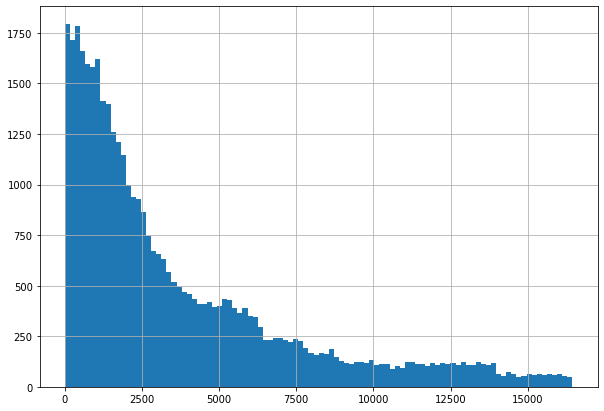

In [32]:
plt.rcParams['figure.figsize'] = (10,7)
df_train['Ranking'].hist(bins=100)

The Ranking distribution is uneven. There are many restaurants taking very low places (below 2500) in its cities

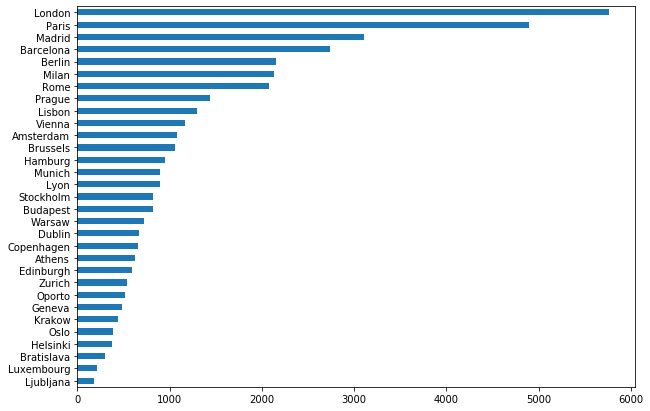

In [33]:
df_train['City'].value_counts(ascending=True).plot(kind='barh')

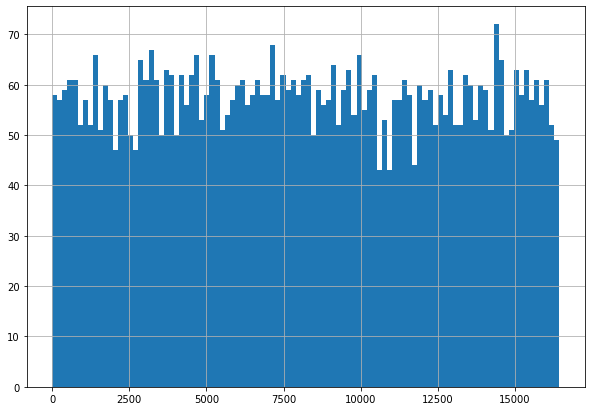

In [34]:
df_train['Ranking'][df_train['City'] =='London'].hist(bins=100)

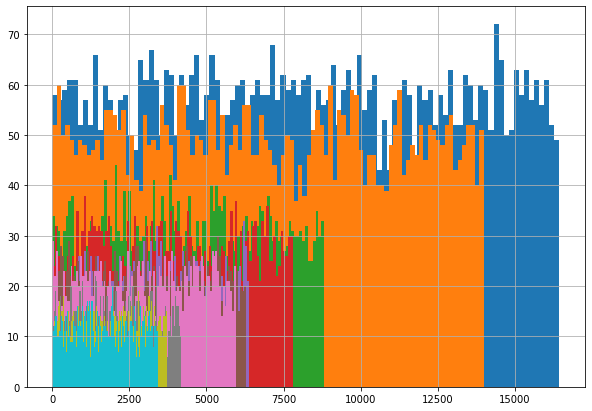

In [35]:
# Let's take a look on top 10 cities
for x in (df_train['City'].value_counts())[0:10].index:
    df_train['Ranking'][df_train['City'] == x].hist(bins=100)
plt.show()

Ranking has normal distribution, but there are more restaurants in big cities which makes several biases. Based on it we can try to normalize the variable with std = 1 and mean = 0


In [36]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
ranking = np.reshape(np.array(data.Ranking), (-1, 1))
ranking = scaler.fit_transform(ranking)
data['Ranking'] = ranking


### Rating variable distribution

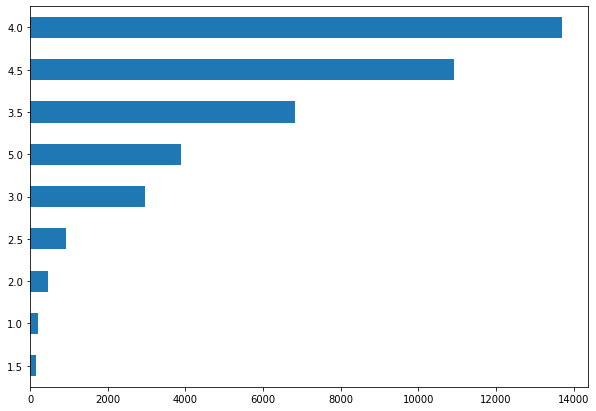

In [37]:
df_train['Rating'].value_counts(ascending=True).plot(kind='barh')

Most of restaurant have rating 4 or 4.5 which is logical. There are no unexpected values like negative. The distribution itself seems to be normal with the bias on the right (to higher rating).

### Let's take a look on target variable in relation with Ranking

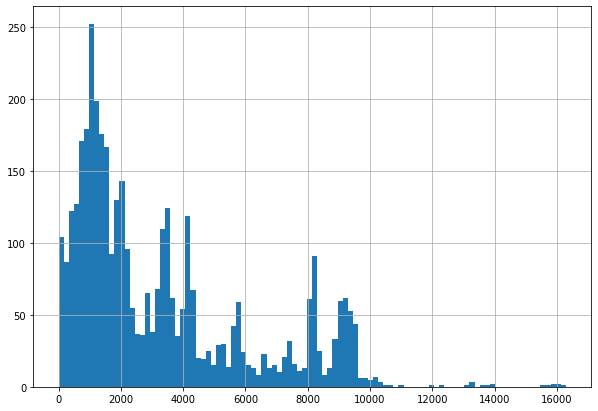

In [38]:
df_train['Ranking'][df_train['Rating'] == 5].hist(bins=100)

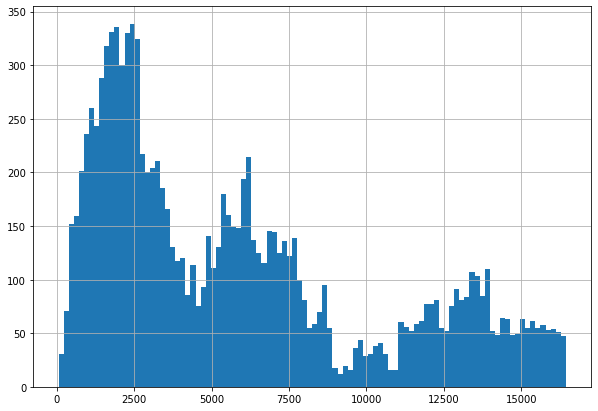

In [39]:
df_train['Ranking'][df_train['Rating'] < 4].hist(bins=100)

It's clear when ranking is higher (5 in our example) the more restaurants are tending to the left (higher place) and less to the lower ones. If rating is a bit lower (4.5) there are more restaurants at lower places but not significantly which seems logical.

### Correlation analysis

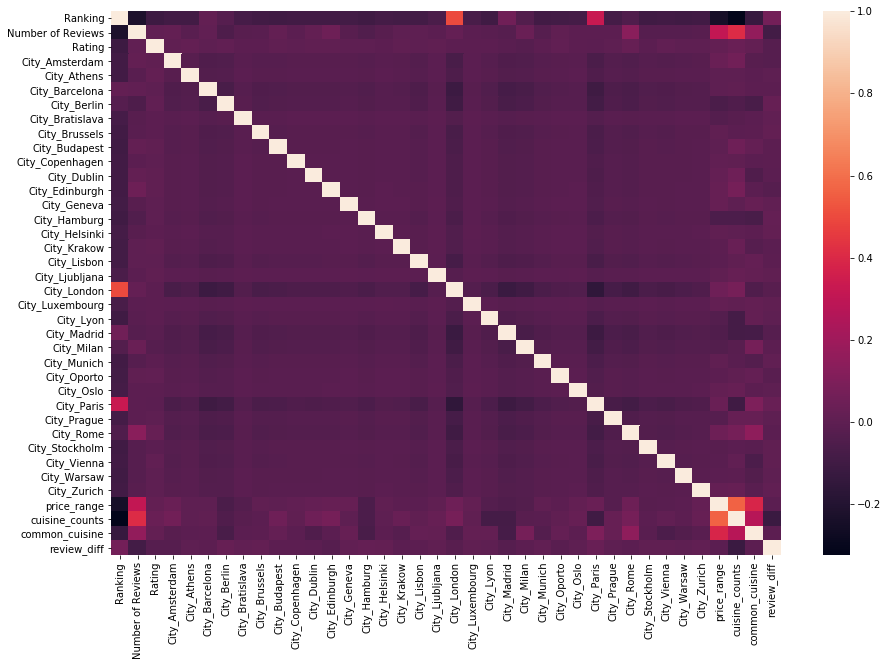

In [40]:
plt.rcParams['figure.figsize'] = (15,10)
sns.heatmap(data.drop(['sample'], axis=1).corr(),)

As we can see our target "rating" variable has low correlation with other features. Moreover, other variables (price_rang, cuisine_counts, common cuisine and number_of_review)are correlated between each other which may cause multicollinearity. It's better to add some new attributes and delete those which are highly correlated.

The main canditates for removing are cuisine_counts and common cuisine. It's logically: the more cuisines a restaurant offers the more chances that it offers one of most common cuisines. Let's delete cuisine counts because it's also highly correlated with number of review. (Before removal MAE was 0.2115)

In [41]:
data = data.drop(['cuisine_counts'], axis=1)

# Data Preprocessing


In [42]:
df_train = pd.read_csv('main_task.csv')
df_test = pd.read_csv('kaggle_task.csv')
df_train['sample'] = 1 
df_test['sample'] = 0 
df_test['Rating'] = 0 

data = df_test.append(df_train, sort=False).reset_index(drop=True) # объединяем
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Restaurant_id      50000 non-null  object 
 1   City               50000 non-null  object 
 2   Cuisine Style      38410 non-null  object 
 3   Ranking            50000 non-null  float64
 4   Price Range        32639 non-null  object 
 5   Number of Reviews  46800 non-null  float64
 6   Reviews            49998 non-null  object 
 7   URL_TA             50000 non-null  object 
 8   ID_TA              50000 non-null  object 
 9   sample             50000 non-null  int64  
 10  Rating             50000 non-null  float64
dtypes: float64(3), int64(1), object(7)
memory usage: 4.2+ MB


In [43]:
def preproc_data(df_input):
    '''includes several functions to pre-process the predictor data.'''
    
    df_output = df_input.copy()
    

    # ################### 1. Preprocessing and fill NA ############################################################## 
    df_output.drop(['Restaurant_id','ID_TA',], axis = 1, inplace=True)
    df_output.fillna(0, inplace=True)
    
    
    # ################### 3. Encoding ############################################################## 

    df_output = pd.get_dummies(df_output, columns=[ 'City',], dummy_na=True)
    
    # Create new column "price_range" with default value 0
    df_output['price_range'] = 0

    # Replace 0 with 1 if Price range is $, 2 if $$ - $$$ etc.
    df_output.loc[(data['Price Range'] == '$') , 'price_range'] = 1
    df_output.loc[(data['Price Range'] == '$$ - $$$') , 'price_range'] = 2
    df_output.loc[(data['Price Range'] == '$$$$') , 'price_range'] = 3
    

    # ################### 4. Feature Engineering ####################################################
    
    cuisine_styles = Counter()
    for i in df_output['Cuisine Style'].dropna():
        if i != 0:
            l = re.sub('\s\'|\'', '', i)[1:-1].split(',')
            cuisine_styles.update(l)
    
    #Average number of cuisines in restaurants
    df_output['Cuisine Style'] = df_output['Cuisine Style'].apply(lambda x: ['other_style'] if x == 0 else x[1:-1].split(','))

    # Create new column cuisine_counts
    df_output['cuisine_counts'] = df_output['Cuisine Style'].apply(lambda x: len(x))

    # Let's add new column which shows whether a restaurant provides one of 10 most common cuisines or not
    most_common_cuisines = ['Vegetarian Friendly', 'European', 'Mediterranean', 'Italian', 'Vegan Options',
                            'Gluten Free Options', 'Bar', 'French', 'Asian', 'Pizza']
    df_output['common_cuisine'] = 0

    for i in most_common_cuisines:
        for j in range(len(df_output['Cuisine Style'])):
            if i in df_output['Cuisine Style'][j][0]:
                df_output['common_cuisine'][j] = 1
                
    # Get reviews dates and calculate the difference between recent and previous reviews           
    df_output['Review_date'] = df_output['Reviews'].str.findall('\d+/\d+/\d+')
    df_output['date_2'] = df_output['Review_date'].apply(lambda x: pd.to_datetime(x))
    df_output['date_2'] = [d.strftime('%Y-%m-%d') if not np.all(pd.isnull(d)) else 0 for d in df_output['date_2']]

    max_dates = []
    min_dates = []
    for i in df_output['date_2']:
        try:
            max_dates.append(i.max())
            min_dates.append(i.min())

        except:
            max_dates.append(0)
            min_dates.append(0)
    
    # Create differences column
    df_output['max_date'] = max_dates
    df_output['min_date'] = min_dates
    df_output['max_date'] = df_output['max_date'].apply(lambda x: pd.to_datetime(x))
    df_output['min_date'] = df_output['min_date'].apply(lambda x: pd.to_datetime(x))
    df_output['review_diff'] = df_output['max_date'] - df_output['min_date']
    df_output['review_diff'] = df_output['review_diff'].dt.days
    df_output = df_output.drop(['max_date', 'min_date'], axis=1)
    
    # Remove cuisine counts column
    df_output = df_output.drop(['cuisine_counts'], axis=1)
    
    #Normalize "Ranking"
    scaler = StandardScaler()
    ranking = np.reshape(np.array(df_output.Ranking), (-1, 1))
    ranking = scaler.fit_transform(ranking)
    df_output['Ranking'] = ranking
    
    # ################### 5. Clean #################################################### 
    object_columns = [s for s in df_output.columns if df_output[s].dtypes == 'object']
    df_output.drop(object_columns, axis = 1, inplace=True)
    
    return df_output

#### Launch and check

In [44]:
df_preproc = preproc_data(data)
df_preproc.sample(10)

C:\Users\victor.kovatsenko\Anaconda3\lib\site-packages\ipykernel_launcher.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,Ranking,Number of Reviews,sample,Rating,City_Amsterdam,City_Athens,City_Barcelona,City_Berlin,City_Bratislava,City_Brussels,...,City_Prague,City_Rome,City_Stockholm,City_Vienna,City_Warsaw,City_Zurich,City_nan,price_range,common_cuisine,review_diff
12305,0.072316,35.0,1,4.5,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5969,0.293123,13.0,0,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,6
2950,-0.115249,0.0,0,0.0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
33237,-0.942804,498.0,1,4.5,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,7
16269,-0.912805,47.0,1,4.5,0,0,0,0,0,1,...,0,0,0,0,0,0,0,2,1,3
9233,-0.929831,42.0,0,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,21
49887,-0.505243,5.0,1,4.0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,190
8928,-0.068763,6.0,0,0.0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27159,2.745789,12.0,1,2.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2,1,0
683,-0.194707,9.0,0,0.0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,190


In [45]:
df_preproc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 39 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Ranking            50000 non-null  float64
 1   Number of Reviews  50000 non-null  float64
 2   sample             50000 non-null  int64  
 3   Rating             50000 non-null  float64
 4   City_Amsterdam     50000 non-null  uint8  
 5   City_Athens        50000 non-null  uint8  
 6   City_Barcelona     50000 non-null  uint8  
 7   City_Berlin        50000 non-null  uint8  
 8   City_Bratislava    50000 non-null  uint8  
 9   City_Brussels      50000 non-null  uint8  
 10  City_Budapest      50000 non-null  uint8  
 11  City_Copenhagen    50000 non-null  uint8  
 12  City_Dublin        50000 non-null  uint8  
 13  City_Edinburgh     50000 non-null  uint8  
 14  City_Geneva        50000 non-null  uint8  
 15  City_Hamburg       50000 non-null  uint8  
 16  City_Helsinki      500

In [46]:
# Testing part
train_data = df_preproc.query('sample == 1').drop(['sample'], axis=1)
test_data = df_preproc.query('sample == 0').drop(['sample'], axis=1)

y = train_data.Rating.values            # target
X = train_data.drop(['Rating'], axis=1)

In [47]:
# Split with train_test_split with test size = 20%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=RANDOM_SEED)

In [48]:
# Check
test_data.shape, train_data.shape, X.shape, X_train.shape, X_test.shape

((10000, 38), (40000, 38), (40000, 37), (32000, 37), (8000, 37))

# Model 


In [49]:
# Additional inports 
from sklearn.ensemble import RandomForestRegressor # model creator
from sklearn import metrics # metrics import

In [50]:
# Creating the model
model = RandomForestRegressor(n_estimators=100, verbose=1, n_jobs=-1, random_state=RANDOM_SEED)

In [51]:
# Fitting model with test data
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    3.7s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished


In [52]:
# Compare results and calculate metric
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))

MAE: 0.211385


### NOTE: for Kaggle score is better not to normalize Ranking and don't delete cuisine_counts. For MAE metrics here final version (as presented in cureent notebook) works better.

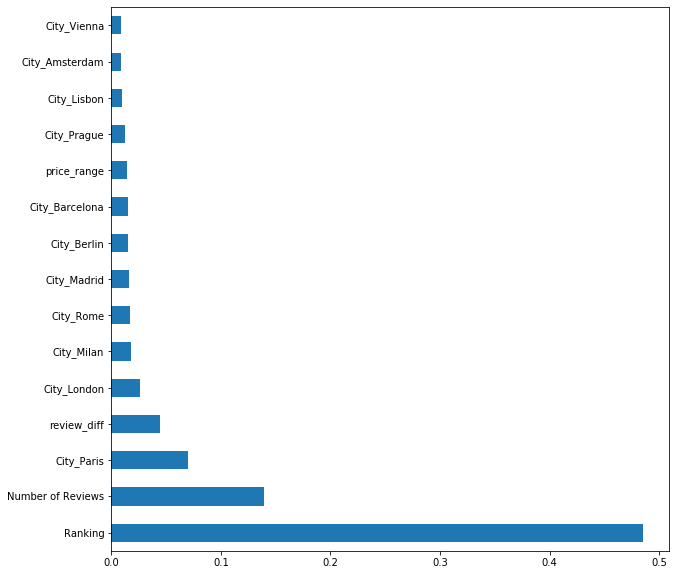

In [53]:
# Show most significant variables
plt.rcParams['figure.figsize'] = (10,10)
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(15).plot(kind='barh')

# Submission

In [54]:
test_data.sample(10)

,Ranking,Number of Reviews,Rating,City_Amsterdam,City_Athens,City_Barcelona,City_Berlin,City_Bratislava,City_Brussels,City_Budapest,...,City_Prague,City_Rome,City_Stockholm,City_Vienna,City_Warsaw,City_Zurich,City_nan,price_range,common_cuisine,review_diff
4731,-0.247139,135.0,0.0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,2,1,380
7440,0.822305,33.0,0.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2,1,493
1668,-0.941453,1402.0,0.0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,2,1,10
960,0.718252,50.0,0.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2,0,4
1854,1.818776,111.0,0.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2,1,253
7019,1.183380,76.0,0.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2,0,35
4976,-0.531729,3.0,0.0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
302,-0.786590,29.0,0.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
717,-0.699565,298.0,0.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2,1,95
7338,1.361756,8.0,0.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,21


In [55]:
test_data = test_data.drop(['Rating'], axis=1)

In [56]:
sample_submission

,Restaurant_id,Rating
0,id_0,2.0
1,id_1,2.5
2,id_2,4.0
3,id_3,1.0
4,id_4,4.0
...,...,...
9995,id_9995,3.0
9996,id_9996,1.5
9997,id_9997,4.5
9998,id_9998,1.0


In [57]:
predict_submission = model.predict(test_data)

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished


In [58]:
predict_submission

array([3.12 , 4.305, 4.485, ..., 3.01 , 4.5  , 4.155])

In [59]:
sample_submission['Rating'] = predict_submission
sample_submission.to_csv('submission.csv', index=False)
sample_submission.head(10)

,Restaurant_id,Rating
0,id_0,3.120
1,id_1,4.305
2,id_2,4.485
3,id_3,4.270
4,id_4,4.470
5,id_5,4.455
6,id_6,2.435
7,id_7,2.840
8,id_8,4.145
9,id_9,4.610
